# 分类任务

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics   

import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [2]:
data_predict = pd.read_csv("test.csv/test.csv")
data_predict.shape

(2000, 561)

In [3]:
df = pd.read_csv("train.csv/train.csv")
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.296740,-0.095583,-0.149633,-0.595541,-0.348377,-0.105778,-0.555876,-0.328171,-0.007438,-0.111450,...,-0.813753,-0.858937,0.168499,0.755665,-0.960499,-0.356184,-0.790964,0.194232,-0.024585,WALKING_UPSTAIRS
1,0.241533,0.148028,-0.186807,-0.546018,-0.033766,-0.269595,-0.513210,-0.050132,-0.258660,-0.016775,...,-0.606716,-0.784652,-0.699995,-0.752739,-0.813536,0.630760,-0.845367,0.292300,0.146064,WALKING_UPSTAIRS
2,0.453328,0.068926,-0.073664,-0.066674,0.238006,-0.193217,-0.392103,0.230603,-0.085971,-0.066394,...,-0.375684,-0.621869,-0.555610,0.503094,0.348503,-0.704697,-0.863582,0.303025,-0.020172,WALKING
3,0.163624,0.009481,-0.287941,-0.844516,-0.813480,-1.016676,-0.907655,-0.817543,-0.867127,-0.990967,...,-0.479371,-0.862992,0.058865,-0.287051,-0.073598,0.093014,0.511801,-0.660934,-0.608260,LAYING
4,0.297012,-0.107238,0.050987,-1.115143,-0.939091,-0.854765,-1.183273,-0.926239,-1.063209,-0.954803,...,-0.482592,-0.609738,-0.146735,0.654697,-0.316524,0.808265,-1.083589,0.144285,-0.098198,STANDING
5,0.426177,0.034807,-0.393804,-0.952682,-0.924203,-0.841593,-1.122674,-0.731735,-0.789317,-0.849941,...,0.489363,0.168882,0.160490,0.253761,-0.863918,-0.604718,-0.836562,0.074654,-0.030419,STANDING
6,0.038688,-0.094637,0.025618,-0.018879,-0.259344,-0.291823,-0.011302,-0.220897,-0.409730,0.501483,...,-0.723785,-0.712282,0.542035,0.729665,-0.878065,-0.080473,-0.881982,0.256253,0.175406,WALKING_DOWNSTAIRS
7,0.135775,0.153149,-0.062592,-1.017791,-0.969964,-1.166632,-0.802138,-1.048284,-1.030092,-1.043422,...,-0.491956,-0.603694,0.004445,0.679534,0.856906,-0.629731,-0.919768,-0.021403,0.113206,STANDING
8,0.240970,0.054999,-0.077079,0.562445,0.141158,-0.363030,0.668667,0.173771,-0.291093,0.441444,...,-0.653892,-0.857059,0.356156,-0.559675,-0.947630,-0.813202,-0.665325,0.357098,0.033293,WALKING_DOWNSTAIRS
9,0.220733,-0.126517,-0.279634,-0.877261,-1.043894,-0.800859,-0.785771,-0.813025,-0.729482,-0.801018,...,-0.564633,-1.056700,-0.050252,0.097808,0.301413,0.422516,-0.789266,0.300486,0.266472,STANDING


In [4]:
df.shape

(8000, 562)

In [5]:
df['Activity'] = df['Activity'].map({
    'LAYING': 0,
    'STANDING': 1,
    'SITTING': 2,
    'WALKING': 3,
    'WALKING_UPSTAIRS': 4,
    'WALKING_DOWNSTAIRS': 5
})

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [14]:
data = df.iloc[:,0:-1]
data.target = df.iloc[:,-1]

scaler = MinMaxScaler() #实例化
scaler = scaler.fit(data) #fit，在这里本质是生成min(x)和max(x)
data1 = scaler.transform(data) #通过接口导出结果

train_x,test_x,train_y,test_y= train_test_split(data1,
                                                 data.target,
                                                 test_size = 0.3,
                                                 random_state = 33)

C:\Users\dell\AppData\Local\Temp\ipykernel_21016\1907394109.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = df.iloc[:,-1]


In [16]:
cv_params = {'max_depth': [1,2,3,4,5,6,7,8]}
other_params = {'learning_rate': 0.1, 'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
# evalute_result = optimized_GBM.grid_scores_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
参数的最佳取值：{'max_depth': 2}
最佳模型得分:0.9651785714285716


[0]	validation_0-mlogloss:1.59874
[1]	validation_0-mlogloss:1.44664
[2]	validation_0-mlogloss:1.32127
[3]	validation_0-mlogloss:1.21490
[4]	validation_0-mlogloss:1.12292
[5]	validation_0-mlogloss:1.04264
[6]	validation_0-mlogloss:0.97065
[7]	validation_0-mlogloss:0.90729
[8]	validation_0-mlogloss:0.85096
[9]	validation_0-mlogloss:0.80094
[10]	validation_0-mlogloss:0.75539
[11]	validation_0-mlogloss:0.71364
[12]	validation_0-mlogloss:0.67592
[13]	validation_0-mlogloss:0.64199
[14]	validation_0-mlogloss:0.61100
[15]	validation_0-mlogloss:0.58233
[16]	validation_0-mlogloss:0.55670
[17]	validation_0-mlogloss:0.53266
[18]	validation_0-mlogloss:0.51111
[19]	validation_0-mlogloss:0.49031
[20]	validation_0-mlogloss:0.47127
[21]	validation_0-mlogloss:0.45381
[22]	validation_0-mlogloss:0.43745
[23]	validation_0-mlogloss:0.42235
[24]	validation_0-mlogloss:0.40855
[25]	validation_0-mlogloss:0.39519
[26]	validation_0-mlogloss:0.38321
[27]	validation_0-mlogloss:0.37219
[28]	validation_0-mlogloss:0.3

[231]	validation_0-mlogloss:0.08823
[232]	validation_0-mlogloss:0.08811
[233]	validation_0-mlogloss:0.08815
[234]	validation_0-mlogloss:0.08800
[235]	validation_0-mlogloss:0.08775
[236]	validation_0-mlogloss:0.08781
[237]	validation_0-mlogloss:0.08774
[238]	validation_0-mlogloss:0.08761
[239]	validation_0-mlogloss:0.08769
[240]	validation_0-mlogloss:0.08761
[241]	validation_0-mlogloss:0.08754
[242]	validation_0-mlogloss:0.08759
[243]	validation_0-mlogloss:0.08735
[244]	validation_0-mlogloss:0.08716
[245]	validation_0-mlogloss:0.08711
[246]	validation_0-mlogloss:0.08708
[247]	validation_0-mlogloss:0.08706
[248]	validation_0-mlogloss:0.08702
[249]	validation_0-mlogloss:0.08686
[250]	validation_0-mlogloss:0.08683
[251]	validation_0-mlogloss:0.08674
[252]	validation_0-mlogloss:0.08671
[253]	validation_0-mlogloss:0.08662
[254]	validation_0-mlogloss:0.08656
[255]	validation_0-mlogloss:0.08650
[256]	validation_0-mlogloss:0.08643
[257]	validation_0-mlogloss:0.08640
[258]	validation_0-mlogloss:

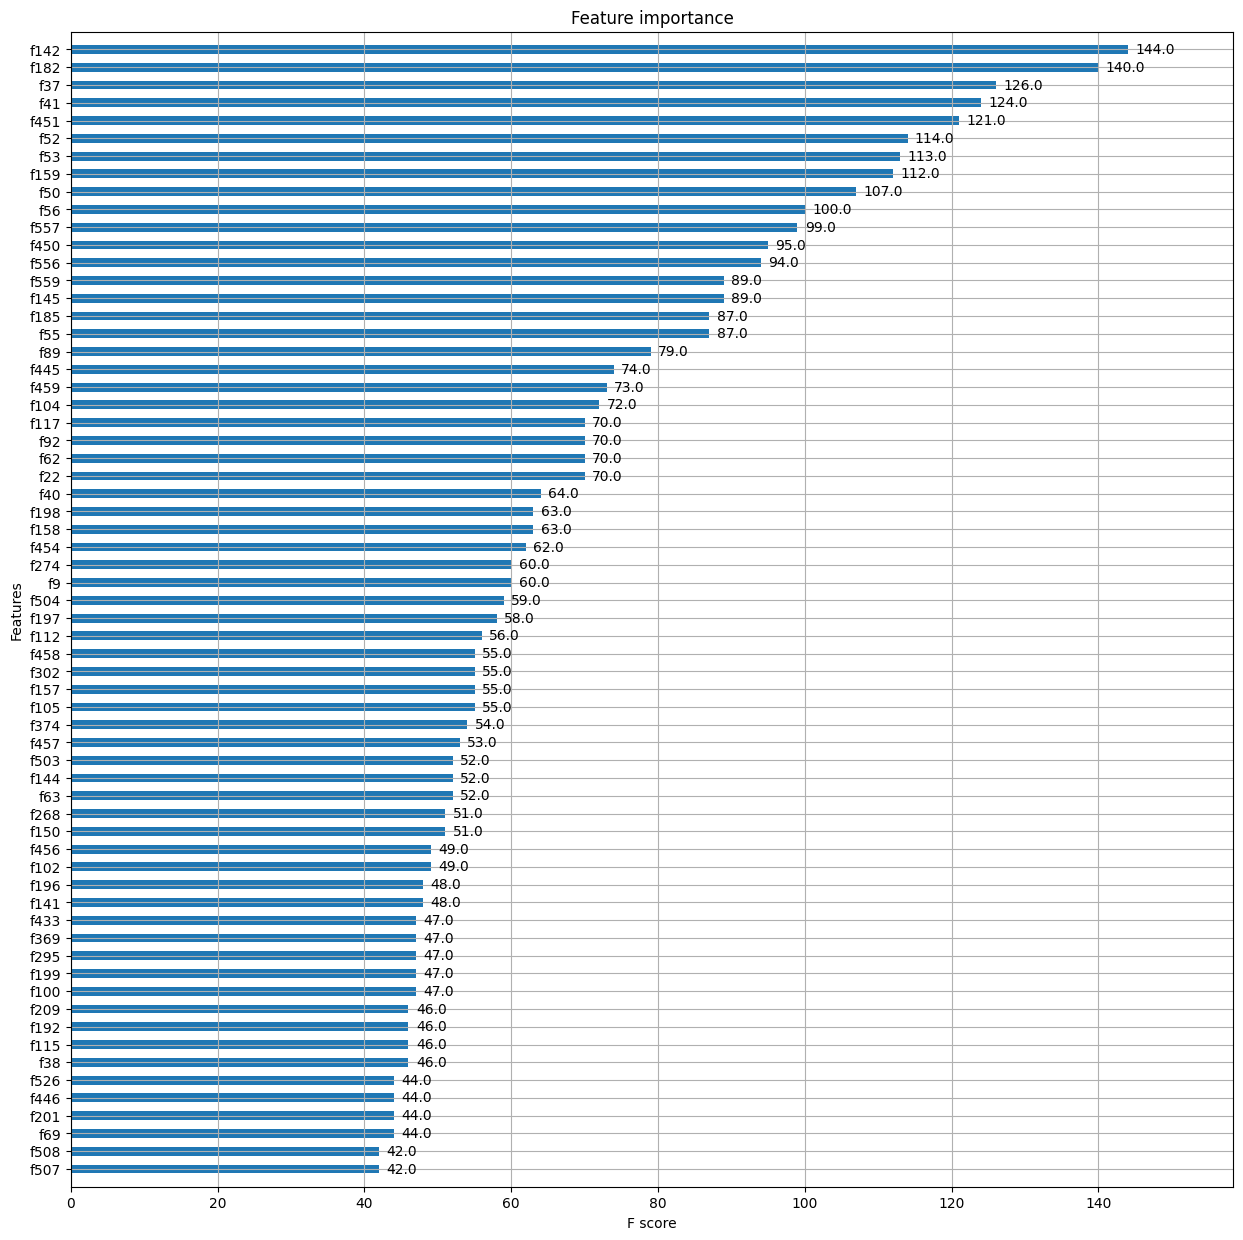

accuarcy: 96.79%


In [17]:
### load module
import matplotlib.pyplot as plt
from sklearn import datasets
# from sklearn.model_selection import train_test_splitX
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb


model = XGBClassifier(learning_rate=0.1,
                      n_estimators=600,         # 树的个数--1000棵树建立xgboost
                      max_depth=3,               # 树的深度
                      gamma=0.1,                  # 惩罚项中叶子结点个数前的参数
                      objective='multi:softmax', # 指定损失函数
                      )
# Parameters: { "colsample_btree", "scale_pos_weight" } are not used.
model.fit(train_x,
          train_y,
          eval_set = [(test_x,test_y)],
          eval_metric = "mlogloss",
          early_stopping_rounds = 10,
          verbose = True)
 
## plot feature importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(model,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()
 
### make prediction for test data
y_pred = model.predict(test_x)
 
### model evaluate
accuracy = accuracy_score(test_y,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))
# accuarcy: 96.79%

In [19]:
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(data_predict) #fit，在这里本质是生成min(x)和max(x)
data_predict = scaler.transform(data_predict) #通过接口导出结果

In [20]:
test_csv_prediction = model.predict(data_predict)
test_csv_prediction = pd.DataFrame(test_csv_prediction)
type(test_csv_prediction)

pandas.core.frame.DataFrame

In [21]:
test_csv_prediction = test_csv_prediction.replace({
    0:'LAYING',
    1:'STANDING',
    2:'SITTING',
    3:'WALKING',
    4:'WALKING_UPSTAIRS',
    5:'WALKING_DOWNSTAIRS'
})

In [22]:
test_csv_prediction.columns = ['Activity']

In [23]:
test_csv_prediction.to_csv('submission.csv',index=0)